# VGG16 Model | AI Art


In [1]:
from keras.layers import Dense, Flatten
from keras.applications import VGG16
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL
from keras.optimizers import Adam

PIL.Image.MAX_IMAGE_PIXELS = None

In [2]:
model_name = "vgg16_model_ai-art"
dataset_base_path = "./datasets/AI art/"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [3]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

Model/history not found.


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            base_model,
            Flatten(),
            Dense(512, activation="relu"),
            Dense(2, activation="softmax"),
        ],
        # optimizer=Adam(learning_rate=0.001)
    )

In [6]:
# Model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 17307 images belonging to 2 classes.
Found 4328 images belonging to 2 classes.


In [8]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/10
  35/1731 [..............................] - ETA: 5:34 - loss: 0.5225 - accuracy: 0.7886

d:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1731/1731 [==============================] - 430s 233ms/step - loss: 0.4022 - accuracy: 0.8415 - val_loss: 0.4185 - val_accuracy: 0.8332
Epoch 2/10
1731/1731 [==============================] - 259s 150ms/step - loss: 0.3858 - accuracy: 0.8494 - val_loss: 0.4151 - val_accuracy: 0.8313
Epoch 3/10
1731/1731 [==============================] - 258s 149ms/step - loss: 0.3794 - accuracy: 0.8487 - val_loss: 0.4019 - val_accuracy: 0.8350
Epoch 4/10
1731/1731 [==============================] - 258s 149ms/step - loss: 0.3729 - accuracy: 0.8499 - val_loss: 0.4125 - val_accuracy: 0.8353
Epoch 5/10
1731/1731 [==============================] - 258s 149ms/step - loss: 0.3692 - accuracy: 0.8523 - val_loss: 0.4076 - val_accuracy: 0.8369
Epoch 6/10
1731/1731 [==============================] - 258s 149ms/step - loss: 0.3654 - accuracy: 0.8535 - val_loss: 0.3924 - val_accuracy: 0.8410
Epoch 7/10
1731/1731 [==============================] - 257s 148ms/step - loss: 0.3614 - accuracy: 0.8556 - val_loss: 0.394

In [9]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/vgg16_model_ai-art/model\assets


INFO:tensorflow:Assets written to: ./models/vgg16_model_ai-art/model\assets


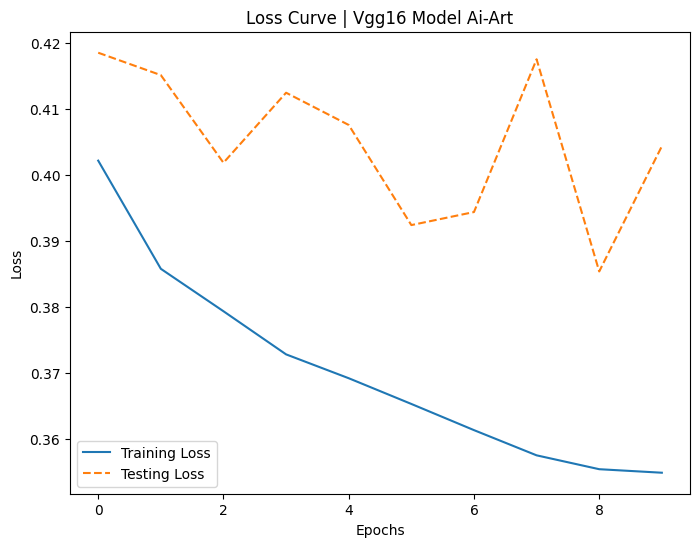

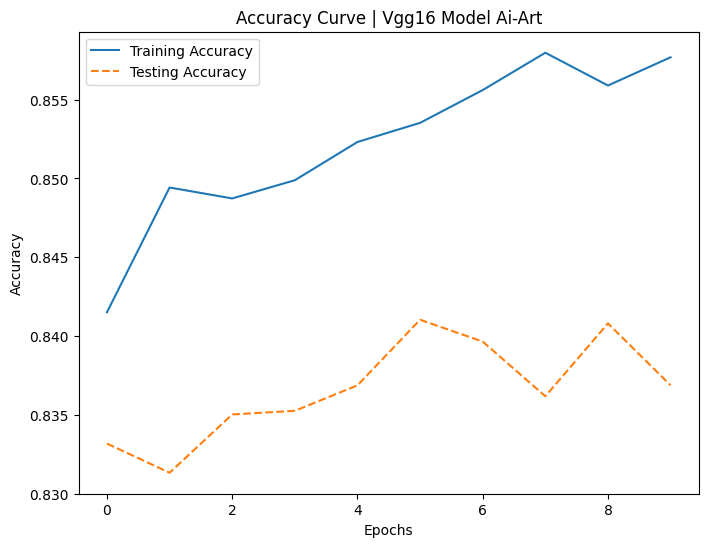

In [10]:
# Plot performance curves
plot_performance_curves(history, model_name)